In [44]:
import math
import numpy.linalg

def robust_pca(M):
    """ 
    Decompose a matrix into low rank and sparse components.
    Computes the RPCA decomposition using Alternating Lagrangian Multipliers.
    Returns L,S the low rank and sparse components respectively
    """
    L = numpy.zeros(M.shape)
    S = numpy.zeros(M.shape)
    Y = numpy.zeros(M.shape)
    print (M.shape)
    mu = (M.shape[0] * M.shape[1]) / (4.0 * L1Norm(M))
    lamb = max(M.shape) ** -0.5
    while not converged(M,L,S):
        L = svd_shrink(M - S - (mu**-1) * Y, mu)
        S = shrink(M - L + (mu**-1) * Y, lamb * mu)
        Y = Y + mu * (M - L - S)
    return L,S
    
def svd_shrink(X, tau):
    """
    Apply the shrinkage operator to the singular values obtained from the SVD of X.
    The parameter tau is used as the scaling parameter to the shrink function.
    Returns the matrix obtained by computing U * shrink(s) * V where 
        U are the left singular vectors of X
        V are the right singular vectors of X
        s are the singular values as a diagonal matrix
    """
    U,s,V = numpy.linalg.svd(X, full_matrices=False)
    return numpy.dot(U, numpy.dot(numpy.diag(shrink(s, tau)), V))
    
def shrink(X, tau):
    """
    Apply the shrinkage operator the the elements of X.
    Returns V such that V[i,j] = max(abs(X[i,j]) - tau,0).
    """
    V = numpy.copy(X).reshape(X.size)
    for i in range(V.size):
        V[i] = math.copysign(max(abs(V[i]) - tau, 0), V[i])
        if V[i] == -0:
            V[i] = 0
    return V.reshape(X.shape)
            
def frobeniusNorm(X):
    """
    Evaluate the Frobenius norm of X
    Returns sqrt(sum_i sum_j X[i,j] ^ 2)
    """
    accum = 0
    V = numpy.reshape(X,X.size)
    for i in range(V.size):
        accum += abs(V[i] ** 2)
    return math.sqrt(accum)

def L1Norm(X):
    """
    Evaluate the L1 norm of X
    Returns the max over the sum of each column of X
    """
    return max(numpy.sum(X,axis=0))

def converged(M,L,S):
    """
    A simple test of convergence based on accuracy of matrix reconstruction
    from sparse and low rank parts
    """
    error = frobeniusNorm(M - L - S) / frobeniusNorm(M)
    print ("error =", error)
    return error <= 10e-10

(3, 5)
error = 1.0
error = 0.007246966109784946
error = 0.0025748625589305254
error = 0.0019625378168051225
error = 0.0009948081518639433
error = 0.0011575346223518933
error = 0.0034965257106276573
error = 0.002869507287276203
error = 0.0018438913951362302
error = 0.0026699772979380267
error = 0.00036741891622477915
error = 0.0007448252346705443
error = 0.0017622082300440222
error = 0.00241203079773584
error = 6.166931241943377e-19


array([[8.54492072, 5.35897209, 4.06403579, 0.53475793, 0.6805714 ],
       [8.79315506, 5.51465298, 4.18209812, 0.55029292, 0.70034235],
       [8.66786771, 5.43607865, 4.12251041, 0.54245219, 0.69036367]])

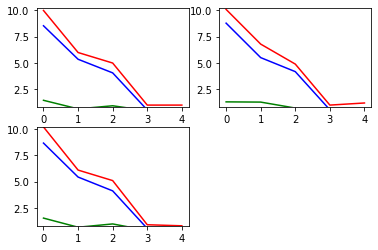

In [45]:
from pylab import plt
import numpy as np
# D = np.array([ [10, 6, 5, 1, 1], [10, 1, 3, 2, 2],[0 , 5,2,-1.1, -1.2],[0, 5,2,-1.15, -1.22]])
D = np.array([ [10, 6, 5, 1, 1], [10.1, 6.8, 4.9, 1, 1.2],[10.2, 6.1, 5.1, 0.9, 0.8]])
n, d = D.shape
sq = np.ceil(np.sqrt(n))
nrows = int(sq)
ncols = int(sq)
ymin = np.nanmin(D)
ymax = np.nanmax(D)
numplots = np.min([n, nrows * ncols])
plt.figure()

[L,E] = robust_pca(D)

tol = 0
for n in range(numplots):
    plt.subplot(nrows, ncols, n + 1)
    plt.ylim((ymin - tol, ymax + tol))
    plt.plot(L[n, :] + E[n, :], 'r')
    plt.plot(L[n, :], 'b')
    plt.plot(E[n, :], 'g')
L

In [7]:
import numpy as np
import pandas as pd

#G = pd.read_csv('data.csv')
# G = pd.read_csv('image.csv')
G = pd.read_csv('data15.csv')
#M = np.array([ [[6], [5], [1]], [[1], [3], [2]],[[5],[2],[1]]])
N = np.squeeze(np.asarray(G))
[L,E] = robust_pca(N)
df = pd.DataFrame(L)
df.to_csv('L15.csv', index = False)
df = pd.DataFrame(E)
df.to_csv('E15.csv', index = False)
#print ('L = ', L)
#print ('E = ', E)
#print ('M = ', L+E )

(39999, 270)
error = 1.0
error = 0.29045624173757906
error = 0.2804116443948445
error = 0.36426596996697796
error = 0.20297573178391543
error = 0.09034989529248333
error = 0.14150715916755796
error = 0.14315413642322236
error = 0.13419945784089574
error = 0.1314103285498007
error = 0.12066946425691166


KeyboardInterrupt: 